# Dynamical Systems and Time Series

## 1. Motivación

Los **sistemas dinámicos** son abstracciones de los procesos físicos que dependen del tiempo.

Un **sistema dinámico** consiste de:
- el **espacio de estados** $M$ (ejemplo, todas las condiciones atmosféricas posibles en un punto de la Tierra
- un **conjunto de reglas** $\phi = \{\phi_p:p\in M\}$ que describen cómo cambia el estado $p\in M$ en el tiempo.


![SegmentLocal](images/lorenz.gif "segment")

_(Gifts extraidos de https://www.youtube.com/watch?v=6i57udsPKms)_

La proyección a las distintas coordenadas genera una **serie temporal**.

![SegmentLocal](images/lorenz_XYZ.gif "segment")

A partir de las series temporales se puede reconstruir el espacio de todas las trayectorias.

![SegmentLocal](images/lorenz_time_series.gif "segment")

Más aun, el Teorema de Takens muestra que a partir de una sola observación se puede reconstruir el espacio de trayectorias. 

![SegmentLocal](images/lorenz_takens.gif "segment")

## 2. El problema

- Pequeñas perturbaciones en las condiciones iniciales generan diferentes comportamientos en el futuro.

<img src="images/lorenz_initial.png" width=800 height=400 />


- Determininar cuándo un  **modelo teórico asociado a observaciones**  es una representación *correcta* de un sistema físico.

<img src="images/modelvsdata.png" width=400 height=400 />

(a) Experimental record
(b) Synthetic solution

_Img from:_ Alonso et at. **Low-dimensional dynamical model for the diversity of pressure patterns used in canary song**. Physical Review E 79 (2009)

## 3. Reconstrucción topológica


La idea es estudiar **propiedades de los sistemas dinámicos** a partir de la **topología** de su espacio de estados.

### 3.1. Atractores

- Maletic, S., Zhao, Y., Rajkovic, M. (2016). _Persistent topological features of dynamical systems._ Chaos, 26 5, 053105.

### El atractor de Lorenz

In [ ]:
import utils

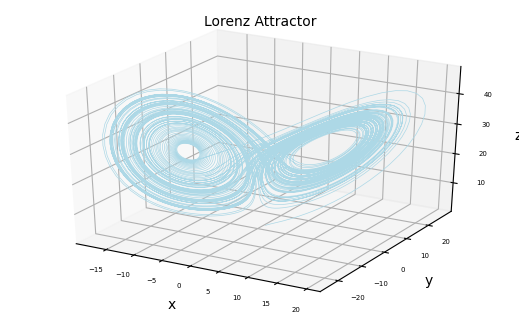

In [39]:
# Lorenz parameters and initial conditions
sigma, beta, rho = 10, 8/3, 28
x0, y0, z0 = 1,1,1
# Maximum time point and total number of time points
tmax, n = 100, 10000
x,y,z = simulate(Lorenz, sigma, beta, rho, x0, y0, z0, tmax, n)
plot_trajectories(x, y, z, 'Lorenz Attractor', 'line')

**Observación**

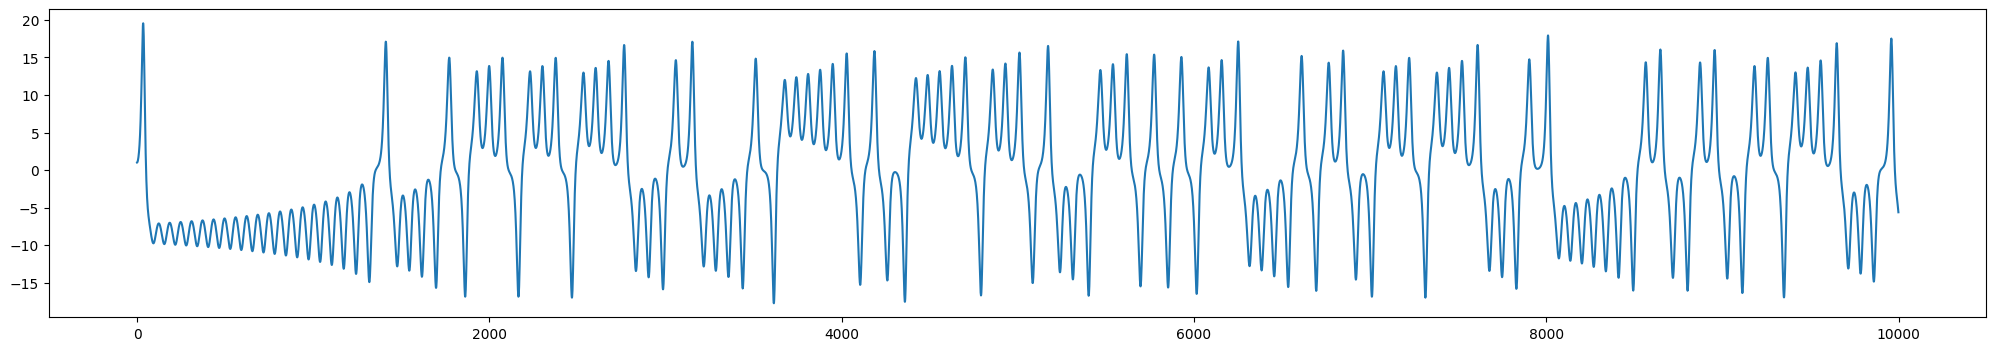

In [40]:
plt.figure(figsize=(25,4))
plt.plot(x)

**Delay Coordinate Embedding**

$X(t) = (x(t), x(t+\tau), x(t + 2\tau), \cdots, x(t+m\tau))$

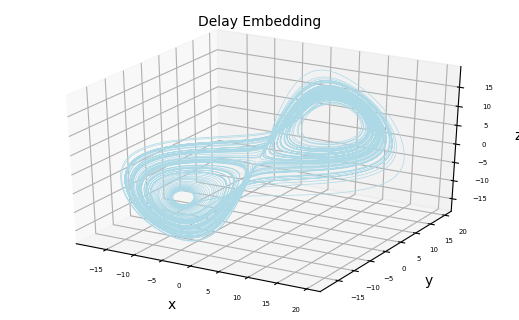

In [41]:
xs, ys, zs = delay_embedding(x, 10)

plot_trajectories(xs, ys, zs, 'Delay Embedding', 'line')

In [42]:
# Uniform re-sampling
lorenz  = np.column_stack((xs, ys, zs))
resampled_lorenz = voxel_down_sample(lorenz, 0.5)
print(len(lorenz), len(resampled_lorenz))

9980 3413


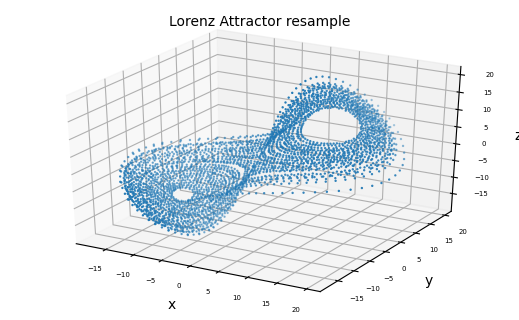

In [43]:
plot_trajectories(resampled_lorenz[:,0],resampled_lorenz[:,1],resampled_lorenz[:,2], 'Lorenz Attractor resample', 'scatter')

In [44]:
#!pip install ripser
from ripser import Rips

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 38.6 s, sys: 2.03 s, total: 40.6 s
Wall time: 1min 5s


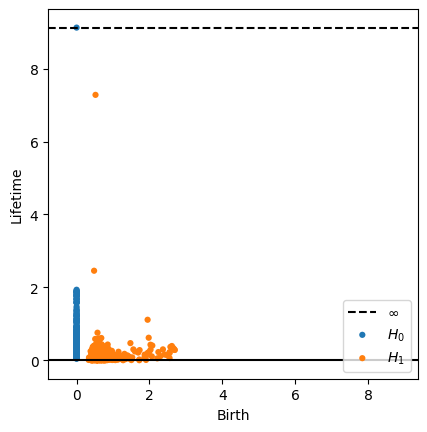

In [45]:
%%time
rips = Rips()
dgms = rips.fit_transform(resampled_lorenz)
rips.plot(dgms, lifetime = True)

### El atractor de Rossler

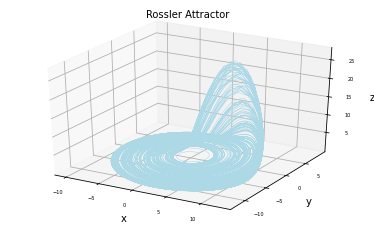

In [21]:
# Rossler parameters and initial conditions
a=0.2
b=0.2
c=6.3
x0, y0, z0 = 1,1,1
# Maximum time point and total number of time points
tmax, n = 1000, 10000
x,y,z = simulate(Rossler, a, b, c, x0, y0, z0, tmax, n)
plot_trajectories(x, y, z, 'Rossler Attractor', 'line')

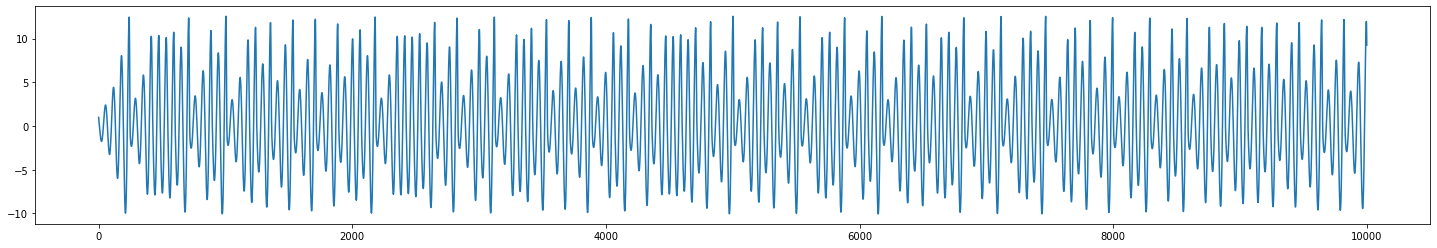

In [24]:
plt.figure(figsize=(25,4))
plt.plot(x)

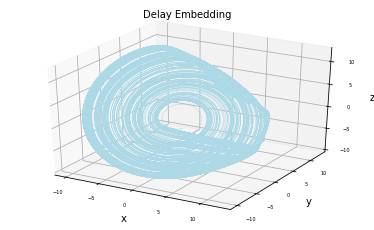

In [26]:
xs, ys, zs = delay_embedding(x, 10)

plot_trajectories(xs, ys, zs, 'Delay Embedding', 'line')

In [27]:
# Uniform re-sampling
rossler  = np.column_stack((xs, ys, zs))
resampled_rossler = voxel_down_sample(rossler, 0.5)
print(len(rossler), len(resampled_rossler))

9980 3016


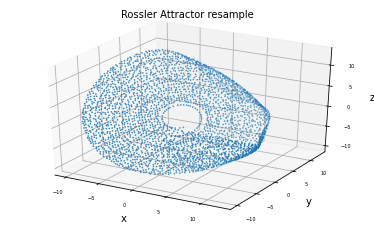

In [28]:
plot_trajectories(resampled_rossler[:,0],resampled_rossler[:,1],resampled_rossler[:,2], 'Rossler Attractor resample', 'scatter')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 23.4 s, sys: 1.34 s, total: 24.7 s
Wall time: 25.6 s


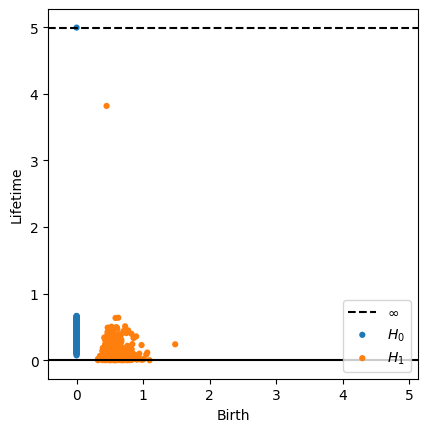

In [46]:
%%time
rips = Rips()
dgms = rips.fit_transform(resampled_rossler)
rips.plot(dgms, lifetime = True)

### 3.2. Periodicidad

Los ciclos en el embedding muestran periodicidad en la serie temporal.

- **Sliding Windows and Persistence: An application of topology to signal analysis**, J. Perea and J. Harer, 2015

<img src="images/periodicity.png" width=800 height=400 />

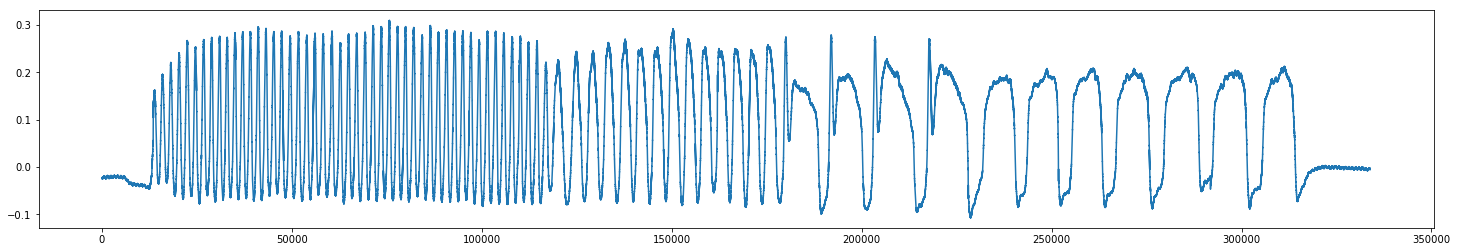

In [7]:
s = np.loadtxt('Presion_canario.txt')
plt.figure(figsize=(25,4))
plt.plot(s)

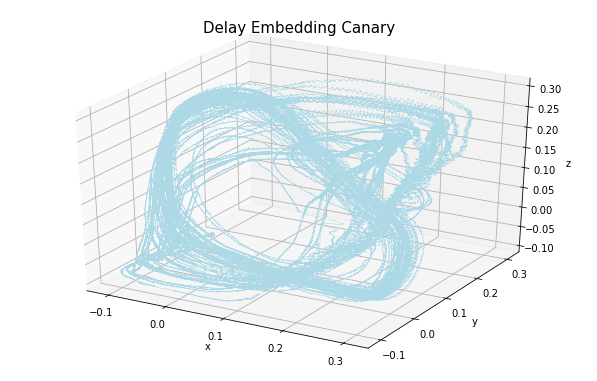

In [8]:
xs, ys, zs = delay_embedding(s, 500)

plot_trajectories(xs, ys, zs, 'Delay Embedding Canary', 'line')

In [11]:
data  = np.column_stack((xs, ys, zs))
resample = voxel_down_sample(data, 0.02)
print(len(data), len(resample))

332871 1724


Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
CPU times: user 27.3 s, sys: 1.37 s, total: 28.6 s
Wall time: 33.1 s


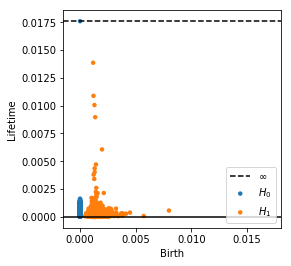

In [24]:
%%time
fermat_distances = compute_fermat_distances(resample, 1.7)
rips = Rips()
diagrams = rips.fit_transform(fermat_distances, distance_matrix = True)
rips.plot(diagrams, lifetime=True)

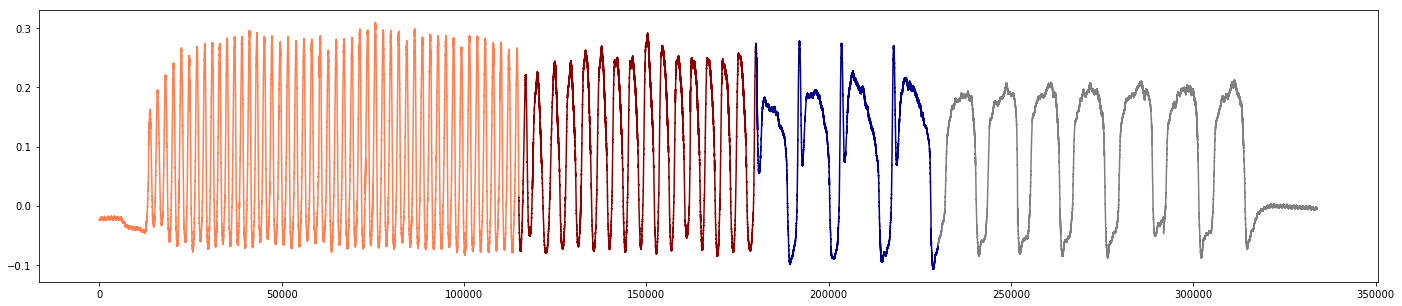

In [36]:
cuts = cuts= [0,115000, 180000, 230000, len(s)]
fig = plt.figure(figsize=(24,5))
color = ['coral', 'darkred', 'darkblue', 'grey']
for i in range(4):
    n=cuts[i]
    N=cuts[i+1]
    plt.plot(range(n,N), s[n:N], color = color[i])

plt.savefig('canario_time_series.png')

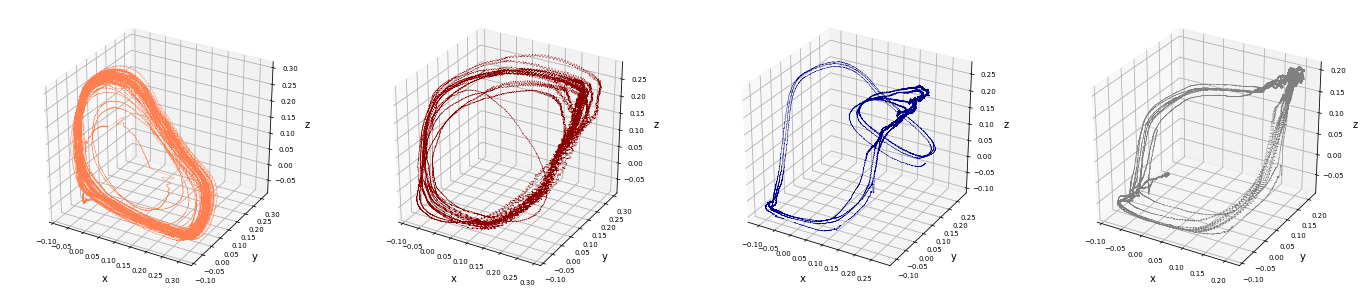

In [37]:
T=500
cuts = cuts= [0,115000, 180000, 230000, len(s)]
fig = plt.figure(figsize=(24,5))
color = ['coral', 'darkred', 'darkblue', 'grey']
subplot = [111,112,113,114]
for i in range(4):
    n=cuts[i]
    N=cuts[i+1]
    xs = s[n:N-2*T]
    ys = s[n+T:N-T]
    zs = s[n+2*T:N]
    ax = fig.add_subplot(1,4,i+1, projection = '3d')
    ax.plot(xs, ys, zs, lw=0.3, color = color[i])
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.set_zlabel('z', fontsize=10)
    plt.tick_params(labelsize=7)

plt.savefig('canario_embedding_cut.png')